In [45]:
# install
!pip install pmdarima

In [46]:
# Import Packages
import pandas as pd
import numpy as np

In [47]:
# Mount the cloud folder for data file storage
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
csvFile = "/content/gdrive/MyDrive/Colab Notebooks/kz.csv"

# reading the csv file to get symptoms and outcomes data
df_data = pd.read_csv(csvFile)
data2 = pd.read_csv(csvFile)
data = pd.read_csv(csvFile)

Mounted at /content/gdrive


In [48]:
# Loading the dataset
df_data['event_time'] = df_data['event_time'].replace(" UTC","", regex=True)
df_data['event_time'] = pd.to_datetime(df_data['event_time'])
df_data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2268105471367840000.00,NaN,karcher,217.57,1515915625443148032.00
...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2268105428166509056.00,electronics.smartphone,oppo,138.87,1515915625514888704.00
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2268105428166509056.00,electronics.smartphone,apple,418.96,1515915625514891264.00
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2268105402447037440.00,appliances.personal.scales,vitek,12.48,1515915625514834176.00
2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2268105440371933952.00,NaN,moulinex,41.64,1515915625514834176.00


In [49]:
# Data transaformation
# Split the categories into sub categories
df_data[['l1_cat', 'l2_cat', 'l3_cat']] = df_data['category_code'].str.split('.',expand=True)

df_data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,l1_cat,l2_cat,l3_cat
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00,electronics,tablet,None
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00,electronics,tablet,None
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00,electronics,audio,headphone
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00,electronics,audio,headphone
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2268105471367840000.00,NaN,karcher,217.57,1515915625443148032.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2268105428166509056.00,electronics.smartphone,oppo,138.87,1515915625514888704.00,electronics,smartphone,None
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2268105428166509056.00,electronics.smartphone,apple,418.96,1515915625514891264.00,electronics,smartphone,None
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2268105402447037440.00,appliances.personal.scales,vitek,12.48,1515915625514834176.00,appliances,personal,scales
2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2268105440371933952.00,NaN,moulinex,41.64,1515915625514834176.00,NaN,NaN,NaN


In [50]:
# Describe Data + some data cleaning
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   order_id       int64         
 2   product_id     int64         
 3   category_id    float64       
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        float64       
 8   l1_cat         object        
 9   l2_cat         object        
 10  l3_cat         object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 221.0+ MB


In [51]:
df_data.describe()

,event_time,order_id,product_id,category_id,price,user_id
count,2633521,2633521.00,2633521.00,2201567.00,2201567.00,564169.00
mean,2020-01-16 19:57:05.412119808,2361782829757762048.00,1674080384807513600.00,2273827014269330176.00,154.09,1515915625486184960.00
min,1970-01-01 00:33:40,2294359932054536960.00,1515966223509088512.00,2268105388421284352.00,0.00,1515915625439952128.00
25%,2020-03-05 15:42:44,2348807245233390080.00,1515966223509116160.00,2268105406750393344.00,14.56,1515915625467185664.00
50%,2020-06-08 08:33:27,2353253589415100416.00,1515966223509611520.00,2268105428166509056.00,55.53,1515915625486696960.00
75%,2020-08-24 06:52:14,2383131118955135488.00,1515966223523309824.00,2268105441856717568.00,196.74,1515915625511581440.00
max,2020-11-21 10:10:30,2388440981134693888.00,2388434452476881920.00,2374498914001945600.00,50925.90,1515915625514891264.00
std,NaN,17165379778976542.00,310224921942725248.00,23532467048797852.00,241.94,23790565.29


In [52]:
# calculate percentage of missing value
df_data.isnull().sum()/len(df_data)

,0
event_time,0.00
order_id,0.00
product_id,0.00
category_id,0.16
category_code,0.23
brand,0.19
price,0.16
user_id,0.79
l1_cat,0.23
l2_cat,0.23


In [53]:
print("Min Date: ", df_data['event_time'].min())
print("Max Date: ", df_data['event_time'].max())

Min Date:  1970-01-01 00:33:40
Max Date:  2020-11-21 10:10:30


In [54]:
df_data['year'] = df_data['event_time'].dt.year
df_data.groupby(['year'])['year'].count()

,year
year,
1970,19631
2020,2613890


In [55]:
df_data = df_data[df_data['year'] != 1970].reset_index(drop=True)

In [56]:
df_data = df_data[df_data['user_id'].notna()].reset_index(drop=True)

In [57]:
# Handling missing price values
products_median_prices = df_data.groupby(['product_id'])['price'].median().reset_index()
products_median_prices = pd.Series(df_data['price'].values, index=df_data['product_id']).to_dict()

# fill in missing prices with the median
df_data['price'] = df_data['price'].fillna(df_data['product_id'].map(products_median_prices))
df_data['price'].isna().sum()

0

In [58]:
# Import libraries - 3
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# suppress scientific notation
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format

In [59]:
data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000.00,NaN,karcher,217.57,1515915625443148032.00


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [61]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_time,2633521,1316174,1970-01-01 00:33:40 UTC,19631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,2633521.00,NaN,NaN,NaN,2361782829757762048.00,17165379778976542.00,2294359932054536960.00,2348807245233390080.00,2353253589415100416.00,2383131118955135488.00,2388440981134693888.00
product_id,2633521.00,NaN,NaN,NaN,1674080384807513600.00,310224921942725248.00,1515966223509088512.00,1515966223509116160.00,1515966223509611520.00,1515966223523309824.00,2388434452476881920.00
category_id,2201567.00,NaN,NaN,NaN,2273827014269330176.00,23532467048797852.00,2268105388421284352.00,2268105406750393344.00,2268105428166509056.00,2268105441856717568.00,2374498914001945600.00
category_code,2021319,510,electronics.smartphone,357682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,2127516,23021,samsung,358928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,2201567.00,NaN,NaN,NaN,154.09,241.94,0.00,14.56,55.53,196.74,50925.90
user_id,564169.00,NaN,NaN,NaN,1515915625486184960.00,23790565.29,1515915625439952128.00,1515915625467185664.00,1515915625486696960.00,1515915625511581440.00,1515915625514891264.00


In [62]:
# Data preprocessing
data = data.drop_duplicates()

In [63]:
data.isnull().sum()

,0
event_time,0
order_id,0
product_id,0
category_id,431953
category_code,612053
brand,505965
price,431953
user_id,2069351


In [64]:
# Filter rows where 'event_time' contains '1970'
filtered_df = data[data['event_time'].str.contains('1970')]

filtered_df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
28813,1970-01-01 00:33:40 UTC,2340102742254551453,1515966223509354098,2268105644970082560.00,NaN,pastel,53.22,NaN
28814,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509117074,2268105427872907776.00,NaN,samsung,30.07,NaN
28815,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509089955,2268105441009468160.00,appliances.kitchen.meat_grinder,moulinex,57.85,NaN
28816,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509297118,2268105392925967104.00,appliances.environment.air_heater,ava,48.59,NaN
28817,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509088552,2268105428166509056.00,electronics.smartphone,samsung,196.27,NaN
...,...,...,...,...,...,...,...,...
55943,1970-01-01 00:33:40 UTC,2348533156149199497,1515966223511370167,2268105446034244352.00,NaN,NaN,3.91,NaN
55944,1970-01-01 00:33:40 UTC,2348533156149199497,2273948223032787798,2268105446034244352.00,NaN,NaN,2.29,NaN
55945,1970-01-01 00:33:40 UTC,2348533156149199497,2273948223032787800,2268105446034244352.00,NaN,NaN,10.16,NaN
55946,1970-01-01 00:33:40 UTC,2348533156308583050,1515966223527009158,NaN,4.63,NaN,NaN,NaN


In [65]:
# exclude rows where 'event_time' contains '1970'


In [66]:
# Import libraries - 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess

import warnings
warnings.filterwarnings('ignore')

In [67]:
# drop all other columns except the two below
data2 = data2[['event_time', 'price']]
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   event_time  object 
 1   price       float64
dtypes: float64(1), object(1)
memory usage: 40.2+ MB


In [68]:
# data preprocessing
data2 = data2.drop_duplicates()
data2.isnull().sum()

,0
event_time,0
price,241375


In [69]:
# remove rows where 'price' contains NaNs
data2 = data2[~data2['price'].isnull()]
data2

,event_time,price
0,2020-04-24 11:50:39 UTC,162.01
2,2020-04-24 14:37:43 UTC,77.52
4,2020-04-24 19:16:21 UTC,217.57
5,2020-04-26 08:45:57 UTC,39.33
6,2020-04-26 09:33:47 UTC,1387.01
...,...,...
2633516,2020-11-21 10:10:01 UTC,138.87
2633517,2020-11-21 10:10:13 UTC,418.96
2633518,2020-11-21 10:10:30 UTC,12.48
2633519,2020-11-21 10:10:30 UTC,41.64


In [70]:
data2.isnull().sum()

,0
event_time,0
price,0


In [71]:
data2.describe(include='all')

,event_time,price
count,2139643,2139643.00
unique,1299919,NaN
top,1970-01-01 00:33:40 UTC,NaN
freq,674,NaN
mean,NaN,155.76
std,NaN,243.61
min,NaN,0.00
25%,NaN,15.02
50%,NaN,57.85
75%,NaN,201.37


In [72]:
# exclude event_time rows that contain 1970
data2 = data2[~data2['event_time'].str.contains('1970')]
#remove UTC from event_time
data2['event_time'] = data2['event_time'].str.replace('UTC','')
data2.describe(include='all')

,event_time,price
count,2138969,2138969.00
unique,1299918,NaN
top,2020-04-09 16:30:01,NaN
freq,155,NaN
mean,NaN,155.71
std,NaN,243.43
min,NaN,0.00
25%,NaN,15.02
50%,NaN,57.85
75%,NaN,201.37


In [73]:
# create date column
data2['date'] = data2.event_time.apply(lambda x: x.split(' ')[0])

# convert to datetime object
data2['date'] = pd.to_datetime(data2['date'])
# delete event_time column
del data2['event_time']
data2.head()

,price,date
0,162.01,2020-04-24
2,77.52,2020-04-24
4,217.57,2020-04-24
5,39.33,2020-04-26
6,1387.01,2020-04-26


In [74]:
# create a new time series
df = data2.groupby('date').agg(sales=('price', 'sum'))
df.head()

,sales
date,
2020-01-05,1151017.74
2020-01-06,1014544.86
2020-01-07,1369143.81
2020-01-08,886054.44
2020-01-09,787447.75


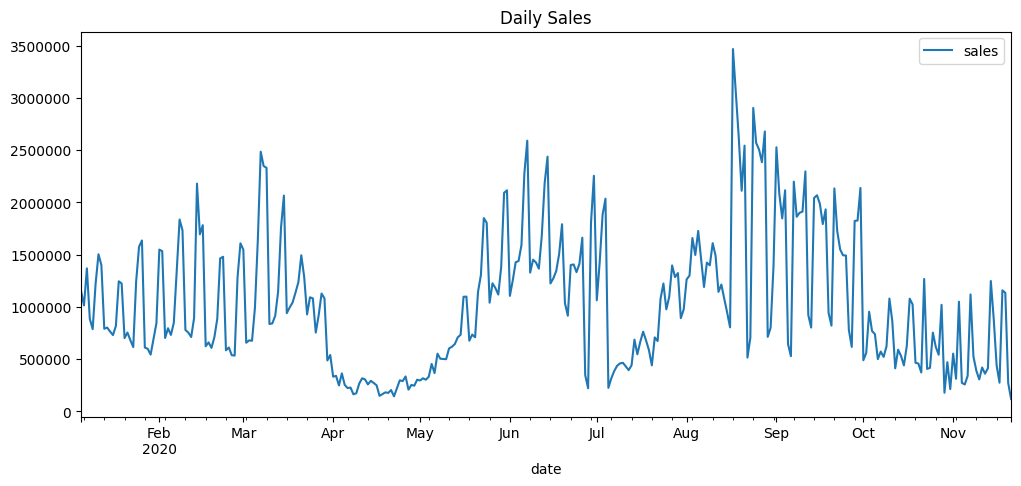

In [75]:
# visualize the time series data
fig, ax = plt.subplots()
plt.ticklabel_format(style='plain')
fig = df.plot(figsize=(12,5), ax=ax)
plt.title('Daily Sales')
plt.show()

In [76]:
# Define RFM Dataset - 1
from pandas.tseries.offsets import MonthEnd

df_data['month_key'] = df_data['event_time'].dt.month
df_data[['event_time', 'month_key']]

,event_time,month_key
0,2020-04-24 11:50:39,4
1,2020-04-24 11:50:39,4
2,2020-04-24 14:37:43,4
3,2020-04-24 14:37:43,4
4,2020-04-24 19:16:21,4
...,...,...
562857,2020-11-21 10:10:01,11
562858,2020-11-21 10:10:13,11
562859,2020-11-21 10:10:30,11
562860,2020-11-21 10:10:30,11


In [77]:
# creating a new dataframe
df_month_keys = pd.DataFrame({"month_key":df_data['month_key'].unique(), 'key':0})
df_user_ids = pd.DataFrame({"user_id":df_data['user_id'].unique(), 'key':0})

df_rfm = df_month_keys.merge(df_user_ids, on='key', how='outer')
df_rfm = df_rfm.drop(columns=['key'])
df_rfm = df_rfm.sort_values(by=['user_id', 'month_key']).reset_index(drop=True)
df_rfm

,month_key,user_id
0,1,1515915625439952128.00
1,2,1515915625439952128.00
2,3,1515915625439952128.00
3,4,1515915625439952128.00
4,5,1515915625439952128.00
...,...,...
1080679,7,1515915625514891264.00
1080680,8,1515915625514891264.00
1080681,9,1515915625514891264.00
1080682,10,1515915625514891264.00


In [78]:
# Recency
# User last month purchase
df_user_month_purchases = df_data[['month_key', 'user_id']].drop_duplicates()
df_user_month_purchases['last_purchase'] = df_user_month_purchases['month_key']

df_rfm = df_rfm.merge(df_user_month_purchases, how='left', on=['month_key', 'user_id'])

# filling the last_purchase month
user_ids = df_rfm[['user_id']]
df_rfm = df_rfm.groupby('user_id').ffill()
df_rfm['R_months_since_last_purchase'] = df_rfm['month_key'] - df_rfm['last_purchase']
df_rfm['user_id'] = user_ids
df_rfm.head(20)

,month_key,last_purchase,R_months_since_last_purchase,user_id
0,1,NaN,NaN,1515915625439952128.00
1,2,NaN,NaN,1515915625439952128.00
2,3,NaN,NaN,1515915625439952128.00
3,4,NaN,NaN,1515915625439952128.00
4,5,NaN,NaN,1515915625439952128.00
5,6,NaN,NaN,1515915625439952128.00
6,7,7.00,0.00,1515915625439952128.00
7,8,7.00,1.00,1515915625439952128.00
8,9,7.00,2.00,1515915625439952128.00
9,10,7.00,3.00,1515915625439952128.00


In [79]:
# Frequency
# user last month purchase order count
df_user_month_purchases = df_data.groupby(['month_key', 'user_id'])['order_id'].nunique().reset_index()
df_rfm = df_rfm.merge(df_user_month_purchases, how='left', on=['month_key', 'user_id'])

# filling the last_purchase month
user_ids = df_rfm[['user_id']]
df_rfm = df_rfm.groupby('user_id').ffill()
df_rfm['user_id'] = user_ids
df_rfm = df_rfm.rename(columns={"order_id":"F_last_monthly_purchases_count"})
df_rfm.head(20)

,month_key,last_purchase,R_months_since_last_purchase,F_last_monthly_purchases_count,user_id
0,1,NaN,NaN,NaN,1515915625439952128.00
1,2,NaN,NaN,NaN,1515915625439952128.00
2,3,NaN,NaN,NaN,1515915625439952128.00
3,4,NaN,NaN,NaN,1515915625439952128.00
4,5,NaN,NaN,NaN,1515915625439952128.00
5,6,NaN,NaN,NaN,1515915625439952128.00
6,7,7.00,0.00,1.00,1515915625439952128.00
7,8,7.00,1.00,1.00,1515915625439952128.00
8,9,7.00,2.00,1.00,1515915625439952128.00
9,10,7.00,3.00,1.00,1515915625439952128.00


In [80]:
# Monetary
# user last monthly purchase value
df_user_month_purchases = df_data.groupby(['month_key','user_id'])['price'].sum().reset_index()
df_rfm=df_rfm.merge(df_user_month_purchases, how='left', on=['month_key','user_id'])

# fill in  last purchase month
user_ids = df_rfm[['user_id']]
df_rfm = df_rfm.groupby('user_id').ffill()
df_rfm['user_id'] = user_ids
df_rfm = df_rfm.rename(columns={"price":"M_last_monthly_purchases_value"})
df_rfm.head(20)

,month_key,last_purchase,R_months_since_last_purchase,F_last_monthly_purchases_count,M_last_monthly_purchases_value,user_id
0,1,NaN,NaN,NaN,NaN,1515915625439952128.00
1,2,NaN,NaN,NaN,NaN,1515915625439952128.00
2,3,NaN,NaN,NaN,NaN,1515915625439952128.00
3,4,NaN,NaN,NaN,NaN,1515915625439952128.00
4,5,NaN,NaN,NaN,NaN,1515915625439952128.00
5,6,NaN,NaN,NaN,NaN,1515915625439952128.00
6,7,7.00,0.00,1.00,416.64,1515915625439952128.00
7,8,7.00,1.00,1.00,416.64,1515915625439952128.00
8,9,7.00,2.00,1.00,416.64,1515915625439952128.00
9,10,7.00,3.00,1.00,416.64,1515915625439952128.00


In [81]:
# define RFM dataframe
# drop all missing values
df_rfm = df_rfm.dropna()
df_rfm = df_rfm[['user_id','month_key','R_months_since_last_purchase','F_last_monthly_purchases_count', 'M_last_monthly_purchases_value']]
df_rfm

,user_id,month_key,R_months_since_last_purchase,F_last_monthly_purchases_count,M_last_monthly_purchases_value
6,1515915625439952128.00,7,0.00,1.00,416.64
7,1515915625439952128.00,8,1.00,1.00,416.64
8,1515915625439952128.00,9,2.00,1.00,416.64
9,1515915625439952128.00,10,3.00,1.00,416.64
10,1515915625439952128.00,11,4.00,1.00,416.64
...,...,...,...,...,...
1080639,1515915625514887424.00,11,0.00,1.00,208.31
1080650,1515915625514887936.00,11,0.00,1.00,3472.20
1080661,1515915625514888704.00,11,0.00,3.00,752.49
1080672,1515915625514891008.00,11,0.00,1.00,925.67


In [82]:
# visualizing PCA - Prinicpal Component Analysis
from sklearn.decomposition import PCA
X = df_rfm[['R_months_since_last_purchase','F_last_monthly_purchases_count','M_last_monthly_purchases_value']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['pca_1','pca_2'])
df_pca

,pca_1,pca_2
0,-146.08,-0.39
1,-146.08,-0.38
2,-146.08,-0.37
3,-146.08,-0.36
4,-146.08,-0.35
...,...,...
496499,-354.41,0.30
496500,2909.47,-10.52
496501,189.78,0.50
496502,362.95,-2.07


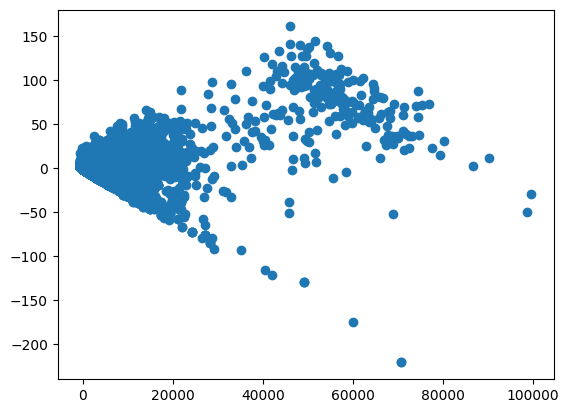

In [83]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df_pca['pca_1'], df_pca['pca_2'])
plt.show()

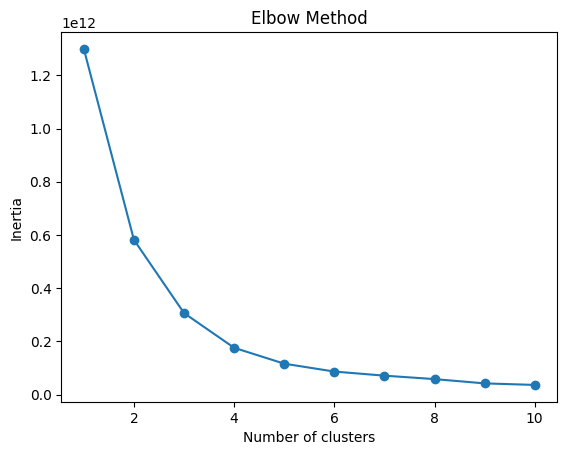

In [84]:
# K means clustering
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

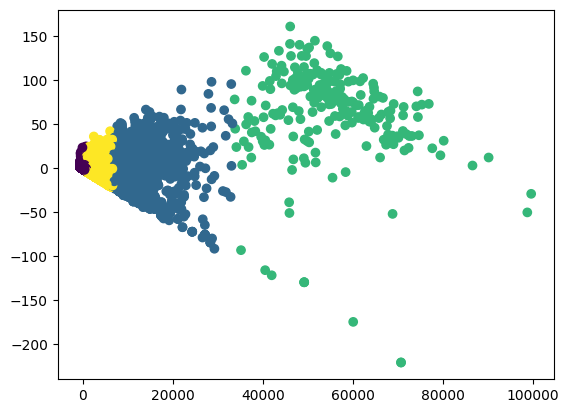

In [85]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)
plt.scatter(df_pca['pca_1'], df_pca['pca_2'], c=kmeans.labels_)
plt.show()

In [86]:
# Analyze results of clustering
df_rfm['kmeans_labels'] = kmeans.labels_
df_rfm.groupby('kmeans_labels')[['R_months_since_last_purchase','F_last_monthly_purchases_count','M_last_monthly_purchases_value']].agg({"mean","count"})


R_months_since_last_purchase          \
                                      mean   count   
kmeans_labels                                        
0                                     1.73  454415   
1                                     0.70    1836   
2                                     0.02     233   
3                                     1.21   40020   

              F_last_monthly_purchases_count          \
                                        mean   count   
kmeans_labels                                          
0                                       1.41  454415   
1                                      28.99    1836   
2                                     246.09     233   
3                                       4.28   40020   

              M_last_monthly_purchases_value          
                                        mean   count  
kmeans_labels                                         
0                                     318.48  454415  
1                                   11963.14    1836  
2                                   55692.50     233  
3                                    2491.95   40020